In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

In [3]:
df_hechos = pd.read_excel('Datasets\homicidios.xlsx',sheet_name = 'HECHOS')

df_hechos.tail(6)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
690,2021-0092,1,2021-12-12,2021,12,12,06:20:00,6,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,...,NaN,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6,PADRE CARLOS MUJICA 709,CALLE,...,709.0,NaN,PADRE CARLOS MUGICA 709,1,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO


In [4]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Observando en dataframe **df_hechos** podemos ver que contamos con 21 columnas, que cuentan con un total de registros de 696 datos,este dataframe tiene toda la información relacionada con el siniestro vial, desde la identificación del hecho vial (**ID**) hasta el conocimiento del vehículo con el cual sucedió el hecho (**ACUSADO**).

También podemos observar que las columnas con más nulos son **Altura** y **Cruce** esto se debe si observas atentamente que cada una indica si el siniestro ocurrio en una altura o un cruce pero ambas se encuentran juntas en la columna **Dirección Normalizada** por lo cual procedo a eliminarlas.

In [5]:
#Eliminacion de columna 'Altura'
df_hechos.drop(columns=['Altura','Cruce'],inplace=True)

En la siguiente celda crearé dos gráficas que me identifique en que *tipo de ubicacion* ocurrio el siniestro, sí se dio en un 'cruce' o en una 'altura' a demás de obsevar el *tipo de calle*.

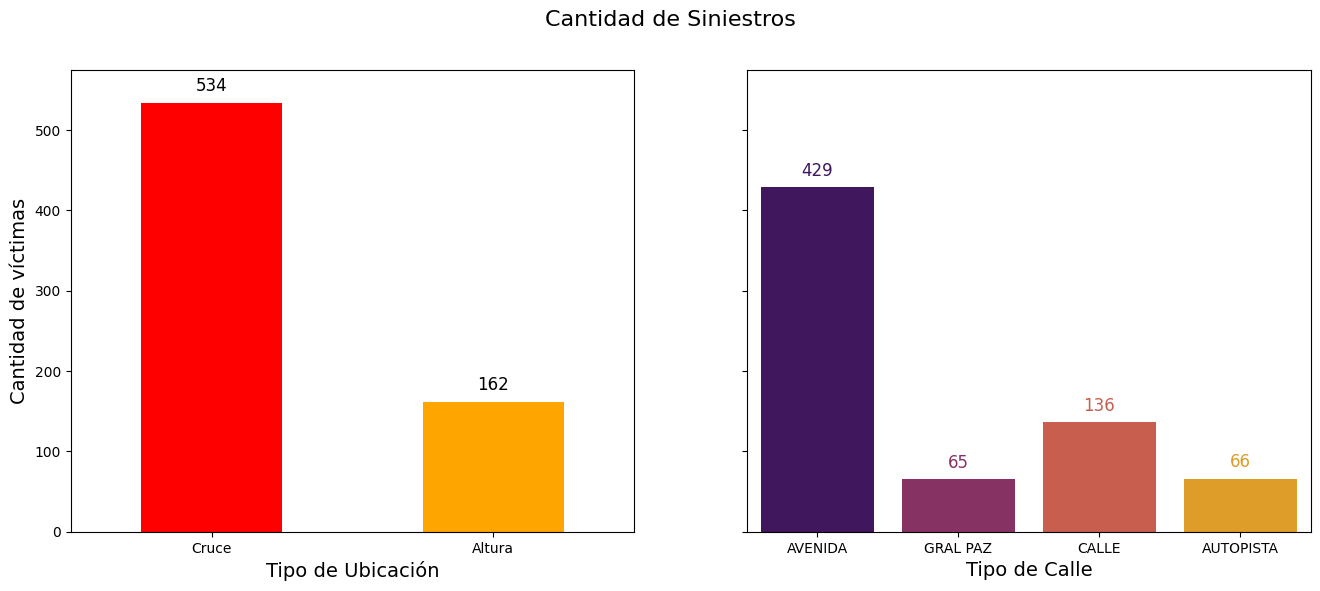

In [6]:
# Asegurarse de que todos los valores en la columna 'Ubicacion' sean cadenas de texto
df_hechos['Dirección Normalizada'] = df_hechos['Dirección Normalizada'].astype(str)

# Crear una nueva columna que identifique si es cruce o altura
df_hechos['Tipo'] = df_hechos['Dirección Normalizada'].apply(lambda x: 'Cruce' if ' y ' in x else 'Altura')

# Contar la cantidad de registros de cada tipo
conteo_tipos = df_hechos['Tipo'].value_counts()

# Crear las gráficas compartiendo el eje y
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Cantidad de Siniestros', fontsize=16)

# Primera gráfica
conteo_tipos.plot(kind='bar', ax=axes[0], color=['red', 'orange'])
axes[0].set_xlabel('Tipo de Ubicación',fontsize=14)
axes[0].set_ylabel('Cantidad de víctimas',fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Agregar el número de siniestros encima de las barras de la primera gráfica
for p in axes[0].patches:
    axes[0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center", xytext=(0, 12), textcoords="offset points", fontsize=12)

# Segunda gráfica
ax = sns.countplot(x=df_hechos['TIPO_DE_CALLE'], palette='inferno', ax=axes[1])
axes[1].set_xlabel('Tipo de Calle',fontsize=14)
axes[1].set_ylabel('')

# Agregar el número de siniestros encima de las barras de la segunda gráfica
for p in ax.patches:
    color = p.get_facecolor()  # Obtener el color de la barra
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", xytext=(0, 12), textcoords="offset points", fontsize=12, color=color)

# Ajustar el límite del eje y si es necesario
axes[0].set_ylim(0, 575)

# Mostrar el gráfico
plt.show()

Con la primera gráfica(izquierda) podemos concluir que la mayor cantidad de accidentes ocurren en en las intercepciones(donde se unen dos avenidas, se une una calle y una avenidad,etc), lo cual no es de extrañar porque en estos puntos entran varias conocimientos en juego, como podria ser la señalización, un punto siego...

Se puede observar en la segunda gráfica(derecha) que la mayor parte de los siniestros ocurren en las avenidas yá que esta es una via muy importante porque es la comunicación de la ciudad con el asentamiento urbano, es decir, es la arteria, si o si para llegar a otros lugares te vez obligado a transitar por allí.La otra cantidad de siniestros importantes las aporta las calles que es donde interactuan los automoviles y las personas, ya que las calles pertenecen a los barrios.

Como conclusión y en comparación con las calles nuestro foco y todas las enérgias gubernamentales se tienen que concentrar en disminuir la alta accidentalidad en las avenidas, disminuyendo su velocidad ya que como se pudo observar en el *Plan de Seguridad Vial de la Ciudad 2016-2019* el 80% de víctimas fatales ocurren con una velocidad asociada a los 60 km/h  y disminuye a la mitad solo mermando la velocidad en a 45 km/h.El gobierno deberá disminuir su velocidad en las vías principales y enfocarse en los cruces.

Continuando con un analisis detallista pude observar que las columnas **LUGAR_DEL_HECHO** y **Calle** no son relevantes para nuestro objectivo ya que 'Lugar del hecho' entra muy al detalle y 'Calle' nos provee el nombre del lugar vial donde ocurrio el siniestro.La informacion relevante la podemos y util para nuestro objetivo la podemos encontrar en la columna **TIPO_DE_CALLE**. Dicho esto procederé a eliminar.

También las columnas **AAAA**, **MM**,**DD**, **HH** procederé a eliminarlas ya que FECHA  contiene esas tres,e eliminaré **HH** ya que **HORA** entra  al detalle.

In [7]:
df_hechos.drop(columns=['AAAA','HH','MM','DD','LUGAR_DEL_HECHO','Calle'],inplace=True)

Luego de toda esta limpieza observaremos con cuantas columnas hemos quedado.

In [8]:
df_hechos.shape

(696, 14)

In [9]:
df_hechos.describe()

,N_VICTIMAS,FECHA,COMUNA
count,696.000000,696,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,7.425287
min,1.000000,2016-01-01 00:00:00,0.000000
25%,1.000000,2017-04-02 12:00:00,4.000000
50%,1.000000,2018-07-12 12:00:00,8.000000
75%,1.000000,2020-01-04 06:00:00,11.000000
max,3.000000,2021-12-30 00:00:00,15.000000
std,0.179393,NaN,4.387050


Haciendo un despliege del dataframe con el método *describe()*, podemos ver que la cantidad de víctimas son mínimo 1 y máximo 3, tenemos registro de los siniestros viales desde el año 2016 hasta 2021, los meses completos, los días también y las comunas que van desde la comuna 0 hasta la comuna 15.En base a esta observación haremos diferentes gráficas.

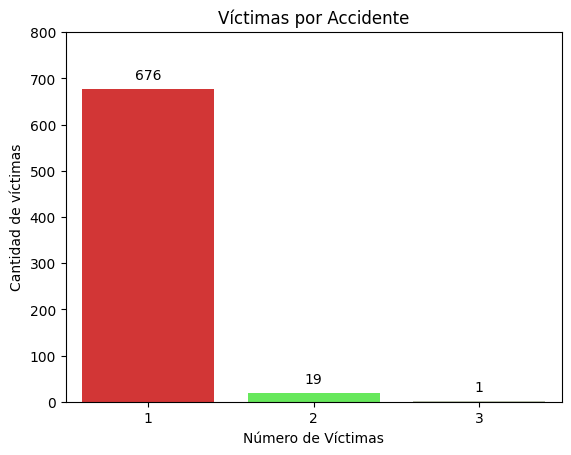

In [10]:
#Gráfica que muestra la cantidad de victimas por accidente
colors=('#EC1C1C','#53FF45','#BFC8AD')
ax=sns.countplot(x=df_hechos['N_VICTIMAS'], palette= colors)

# Agregar el total en la parte superior de las barras con texto ajustable
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", xytext=(0, 10), textcoords="offset points")
    
plt.title('Víctimas por Accidente')  
plt.xlabel('Número de Víctimas') 
plt.ylabel('Cantidad de víctimas')
plt.ylim(0,800)
plt.show() 

Podemos ver en esta gráfica que por fortuna si asi se puede decir la mayoria de siniestros viales solo deja una victima, es muy raro que se presenten mas victimas y casi estraordinario cuando las victimas mortales son tres.

Ahora veremos la cantidad de victimas morteles por año.

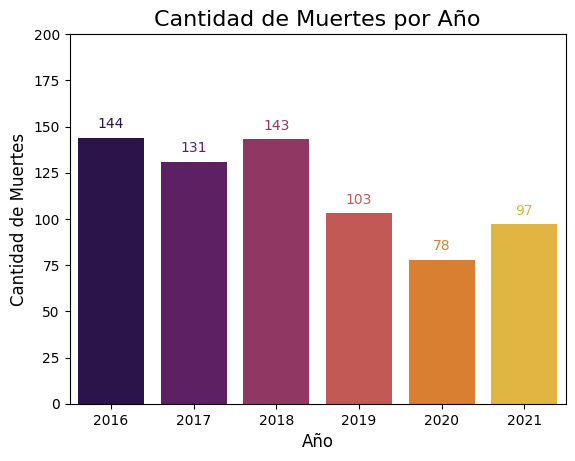

In [11]:
# Gráfico de barras para visualizar la cantidad de fatalidades por año
ax=sns.countplot(x=df_hechos['FECHA'].dt.year, palette='inferno')

# Ajustar las etiquetas y el título
plt.title('Cantidad de Muertes por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Muertes', fontsize=12)

# Agregar el número de fatalidades dentro de cada barra con el color de la barra
for p in ax.patches:
    color = p.get_facecolor()  # Obtener el color de la barra
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", xytext=(0, 10), textcoords="offset points", fontsize=10, color=color)

# Mostrar el gráfico
plt.ylim(0,200)
plt.show()

Podemos ver una disminución de víctimas fatales para los años 2019 hasta el 2021 que si analizamos profundamente no es significativo porque en este lapso de tiempo se vivió la pandemia mundial y se hubiera esperado una disminuición sustancial en víctimas de accidentes viales, incluso se observa que para el año 2021 empezó a haber un incremento, lo cual nos diría que la gente empezó a salir más y retomar una vida normal como la que se vivia antes de pandemia.

En la siguiente gráfica observaremos el comportamiento de los meses en relacion con los años 2016 y 2017 

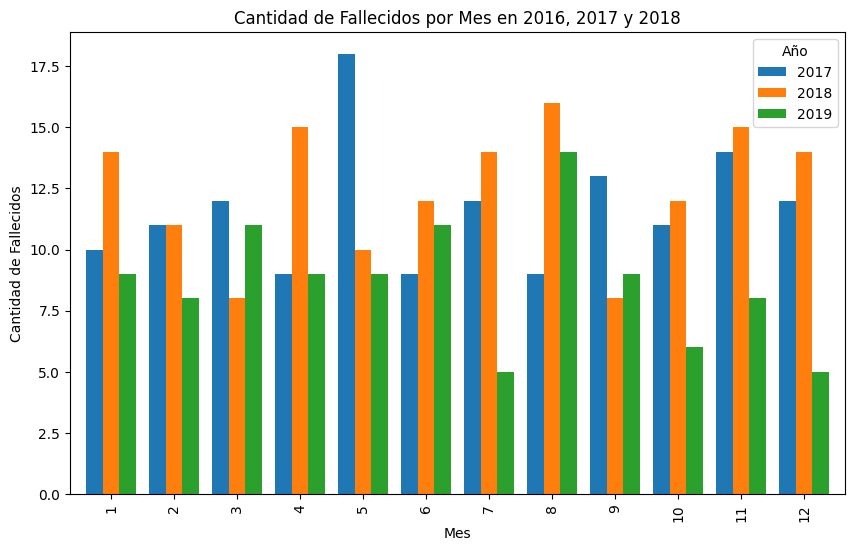

In [12]:
# Convertir la columna 'Fecha' a datetime
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

# Filtrar los datos para los años 2016 y 2017
df_filtered = df_hechos[(df_hechos['FECHA'].dt.year == 2017) | (df_hechos['FECHA'].dt.year == 2018) | (df_hechos['FECHA'].dt.year == 2019)]

# Extraer el mes y el año
df_filtered['Año'] = df_filtered['FECHA'].dt.year
df_filtered['Mes'] = df_filtered['FECHA'].dt.month

# Agrupar por año y mes y sumar los fallecidos
df_grouped = df_filtered.groupby(['Año', 'Mes'])['N_VICTIMAS'].sum().reset_index()

# Pivotar los datos para tener una columna para cada año
df_pivot = df_grouped.pivot(index='Mes', columns='Año', values='N_VICTIMAS')

# Crear la gráfica comparativa
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Cantidad de Fallecidos por Mes en 2017, 2018 y 2019')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Fallecidos')
plt.legend(title='Año')
#plt.xticks(rotation=0)

Viendo la distribución por mes de los años 2017, 2018 y 2019, se pudo observar que casi en todos los meses de los años 2017 y 2018 se mantiene la misma tendencia en el número de víctimas fatales. En el año 2019, hubo una disminución, y esto se podría deber al hecho del inicio de la pandemia.

Yendo un poco más a fondo, se observó el *Plan de Seguridad Vial de la Ciudad 2016-2019* de Argentina y su meta, que era "reducir en un 30% las víctimas fatales por siniestros viales para 2019". Yo diría que fracasarón, yá que, si bien es cierto que para el año 2019 hubo una tendencia a la baja, ésta es perfectamente justificable debido a la pandemia. Sin embargo, en los años 2017 y 2018 hubo picos que arruinaron este propósito.

En la próxima gráfica observaremos cuales son los días de la semana más críticos de la semana tomando todos los años que tenemos.

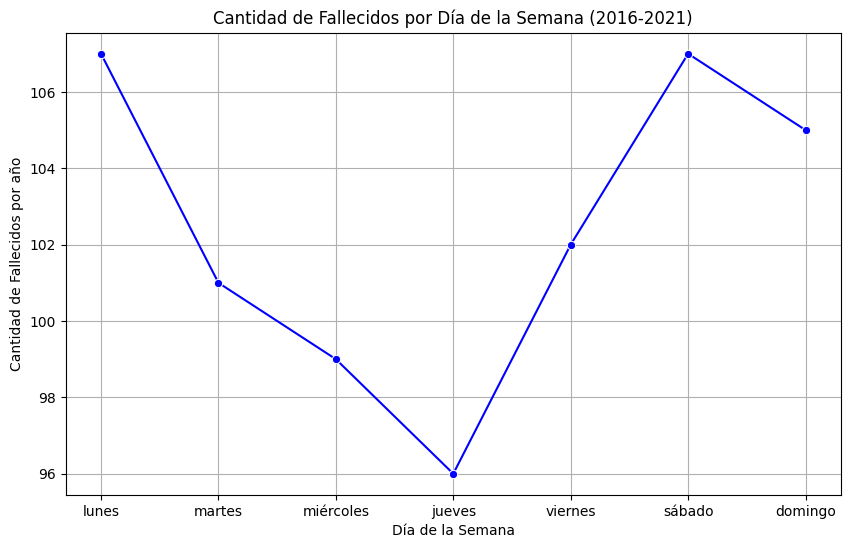

In [13]:
# Filtrar los datos para los años 2016 a 2021
df_filtered = df_hechos[(df_hechos['FECHA'].dt.year >= 2016) & (df_hechos['FECHA'].dt.year <= 2021)]

# Extraer el día de la semana en español
dias_semana_es = {0: 'lunes', 1: 'martes', 2: 'miércoles', 3: 'jueves', 4: 'viernes', 5: 'sábado', 6: 'domingo'}

df_filtered['DiaSemana'] = df_filtered['FECHA'].dt.dayofweek.map(dias_semana_es)

# Agrupar por día de la semana y sumar los fallecidos
df_grouped = df_filtered.groupby('DiaSemana')['N_VICTIMAS'].sum().reindex(dias_semana_es.values())

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, marker='o', color='blue')
plt.title('Cantidad de Fallecidos por Día de la Semana (2016-2021)')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Fallecidos por año')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Se puede observar que los días pico de siniestralidad van desde el día viernes hasta el lunes, no es de extrañar ya que normalmente son los días de más actividad social, y que este implicado el lunes indica que se viene de un fin de semana que muchas veces se le prolonga a las personas hasta este día.

Por último para acabar con la columnas observadas en el *describe()* análizaremos la comuna con más siniestralidad vial.

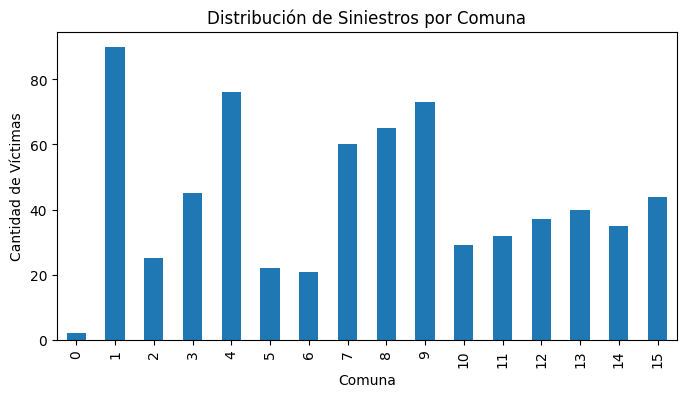

In [14]:
# Gráfico de barras para COMUNA
plt.figure(figsize=(8, 4))
df_hechos['COMUNA'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.title('Distribución de Siniestros por Comuna')
plt.show()

Podemos observar que hay aprox 6 ó 7 comunas las que resultan mas afectadas en el tema de siniestralidad vial, en la proxima gráfica observaremos el porcentaje que aportan estas comunas y profundizaremos en la razón de porque son estas las que mas víctimas aportan.

In [15]:
# Obtener la cuenta de incidentes por comuna
comuna_counts = df_hechos['COMUNA'].value_counts().sort_index()

# Calcular los porcentajes
total_incidentes = comuna_counts.sum()
porcentajes = (comuna_counts / total_incidentes * 100).round(2)

# Crear un DataFrame con las cantidades y porcentajes
tabla_comuna = pd.DataFrame({ 'Cantidad de Incidentes': comuna_counts, '%': porcentajes})

# Ordenar la tabla descendentemente por la columna '%'
tabla_comuna = tabla_comuna.sort_values(by='%', ascending=False)

# Mostrar la tabla ordenada
print(tabla_comuna)

        Cantidad de Incidentes      %
COMUNA                               
1                           90  12.93
4                           76  10.92
9                           73  10.49
8                           65   9.34
7                           60   8.62
3                           45   6.47
15                          44   6.32
13                          40   5.75
12                          37   5.32
14                          35   5.03
11                          32   4.60
10                          29   4.17
2                           25   3.59
5                           22   3.16
6                           21   3.02
0                            2   0.29


![Esta es una descripción de la imagen](Datasets/Mapa-ciudad-de-buenos-aires.jpg)

Se puede observar que la comunas mas grandes en la coordenadas suroestes cercanas al puerto son las que más víctimas presentan, como son la comuna 1, comuna 4.La comuna 8 y 9 que son las que siguen en porcentaje tienen una avenidad, la comuna 9 a la av.General Paz y la comuna 8 la av.27 de Febrero, lo cual concuerda con la tasa alta de siniestralidad presentada en las avenidas ya que las demas comunas tambien son lindadas por avenidas, el unico caso extraño sería la comuna 3 que es mas pequeña y con menos barrios pero se puede observar que esta en medio de las comunas 1 y 4 los cual seria valido para decir que este es un punto abligado para muchos que quieran salir o entrar de siertos barrios de la comuna 1.

Ahora analizaremos las columnas de **ACUSADO** y **VICTIMA** para observar que tipo de vehiculo en que se causa los siniestros y cuales son las victimas.

In [16]:
tabla_contingencia = pd.crosstab(df_hechos['VICTIMA'], df_hechos['ACUSADO'])

# Visualizar la tabla de contingencia
tabla_contingencia

ACUSADO,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
VICTIMA,,,,,,,,,,
AUTO,31,0,14,0,3,21,1,9,4,0
BICICLETA,8,0,10,0,1,0,1,8,0,1
CARGAS,1,0,4,0,0,1,0,1,0,0
MOTO,83,2,78,25,8,40,4,46,9,0
MOVIL,0,0,1,0,0,0,0,1,0,0
OBJETO FIJO,1,0,0,0,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,0,0,3,1,0
PEATON,77,5,38,30,5,0,0,105,4,0
PEATON_MOTO,0,0,0,1,0,0,0,0,0,0


* Podemos ver que cuando el acusado es Auto, la mayoria de las víctimas son autos, motos, y peatones.
* Cuando el acusado es Cargas, las victimas son variadas; siendo Motos y Peatones los más afectados.
* Cuando el acusado es Pasajeros, las víctimas son principalmente Peatones y Motos.

Le daremos una ultima mirada al dataframe.

In [17]:
df_hechos.head(3)

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Tipo
0,2016-0001,1,2016-01-01,04:00:00,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Cruce
1,2016-0002,1,2016-01-02,01:15:00,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,Cruce
2,2016-0003,1,2016-01-03,07:00:00,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,Altura


Dandole una Última mirada a el dataframe decidi sacar las columnas **XY (CABA)** y **PARTICIPANTES** yá que la primera señala el punto exácto donde ocurre el siníestro y con las columnas de coordenadas(**pos x**,**pos y**) puedo hacer un analisis posterior, la segunda columna eliminada es porque es la combinación de las columnas **VICTIMA** y **ACUSADO**.

In [18]:
df_hechos.drop(columns=['XY (CABA)','PARTICIPANTES'],inplace=True)

Se observa el formato final de las columnas.

In [19]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   HORA                   696 non-null    object        
 4   TIPO_DE_CALLE          696 non-null    object        
 5   Dirección Normalizada  696 non-null    object        
 6   COMUNA                 696 non-null    int64         
 7   pos x                  696 non-null    object        
 8   pos y                  696 non-null    object        
 9   VICTIMA                696 non-null    object        
 10  ACUSADO                696 non-null    object        
 11  Tipo                   696 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 65.4+ KB

Observando la columna de **HORA**, **pos x** y **pos y** puedo ver que son de tipo object y decido darled el formato correcto.

In [20]:
df_hechos['HORA'].nunique()

375

Observando el resultado arrojado por el metodo *nunique()* puedo inferir que a parte del el formato de hora tiene una filas con otro tipo de formato.

Por lo tanto voy a corregir para tener un mismo formato

In [21]:
df_hechos['HORA'] = df_hechos['HORA'].replace('SD', np.nan)
df_hechos['HORA'] = pd.to_datetime(df_hechos['HORA'], format='%H:%M:%S')

Al cambiar las columnas de las coordenadas, voy a forzar los datos que sean del tipo diferente a fecha para no tener errores.Al final se que voy a quedar con algunos nulos pero espero no me afecten.

In [22]:
df_hechos['pos x'] = pd.to_numeric(df_hechos['pos x'], errors='coerce')
df_hechos['pos y'] = pd.to_numeric(df_hechos['pos y'], errors='coerce')

In [23]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   HORA                   695 non-null    datetime64[ns]
 4   TIPO_DE_CALLE          696 non-null    object        
 5   Dirección Normalizada  696 non-null    object        
 6   COMUNA                 696 non-null    int64         
 7   pos x                  684 non-null    float64       
 8   pos y                  684 non-null    float64       
 9   VICTIMA                696 non-null    object        
 10  ACUSADO                696 non-null    object        
 11  Tipo                   696 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usa

In [24]:
df_hechos.to_csv('hechos.csv')